---
title: "Model Diagnostic"
sidebar: start
---

The BI class can compute model diagnostics for a given model.

Lets concider the following model for a linear regression:

$$
Y_i \sim \text{Normal}(\alpha + \beta   X_i, \sigma)
$$

$$
\alpha \sim \text{Normal}(0, 1)
$$

$$
\beta \sim \text{Normal}(0, 1)
$$

$$
\sigma \sim \text{Uniform}(0, 50)
$$

In [1]:
from BI import bi
import jax.numpy as jnp
# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data('Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(data=['weight'])


 # define model ------------------------------------------------
def model(weight, height):    
    a = m.dist.normal( 178, 20, name = 'a')
    b = m.dist.log_normal(  0, 1, name = 'b')   
    s = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(a + b * weight , s, obs=height, shape=(weight.shape[0],))

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500,num_chains=4) 
m.summary()

jax.local_device_count 16


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,154.66,0.28,154.22,155.11,0.01,0.01,1912.82,1630.66,1.0
b,5.80,0.28,5.38,6.25,0.01,0.01,1779.03,1519.74,1.0
s,5.14,0.20,4.81,5.47,0.00,0.00,2005.82,1068.71,1.0


# List of all available diagnostics

For additional documentation check the [diagnostics API reference](../api_diag.qmd)

## Predictions from model base on specific data value

In [2]:
m.sample() # Predictions from model base on data in data_on_model
m.sample(data=dict(weight=jnp.array([0.4])), remove_obs=False)# Predictions from a given value

{'x': Array([149.77945571], dtype=float64)}

## Forest plot of estimated values

In [3]:
m.diag.forest()

## Density plots of the posterior distribution

In [4]:
m.diag.density()

## Posterior distribution plots

In [5]:
m.diag.posterior()

## Trace plots for MCMC chains

In [6]:
m.diag.plot_trace()

## Pairwise plots of the posterior distribution

In [7]:
m.diag.pair()

## Plot autocorrelation of the MCMC chains

In [8]:
m.diag.autocor()

## Create rank plots for MCMC chains

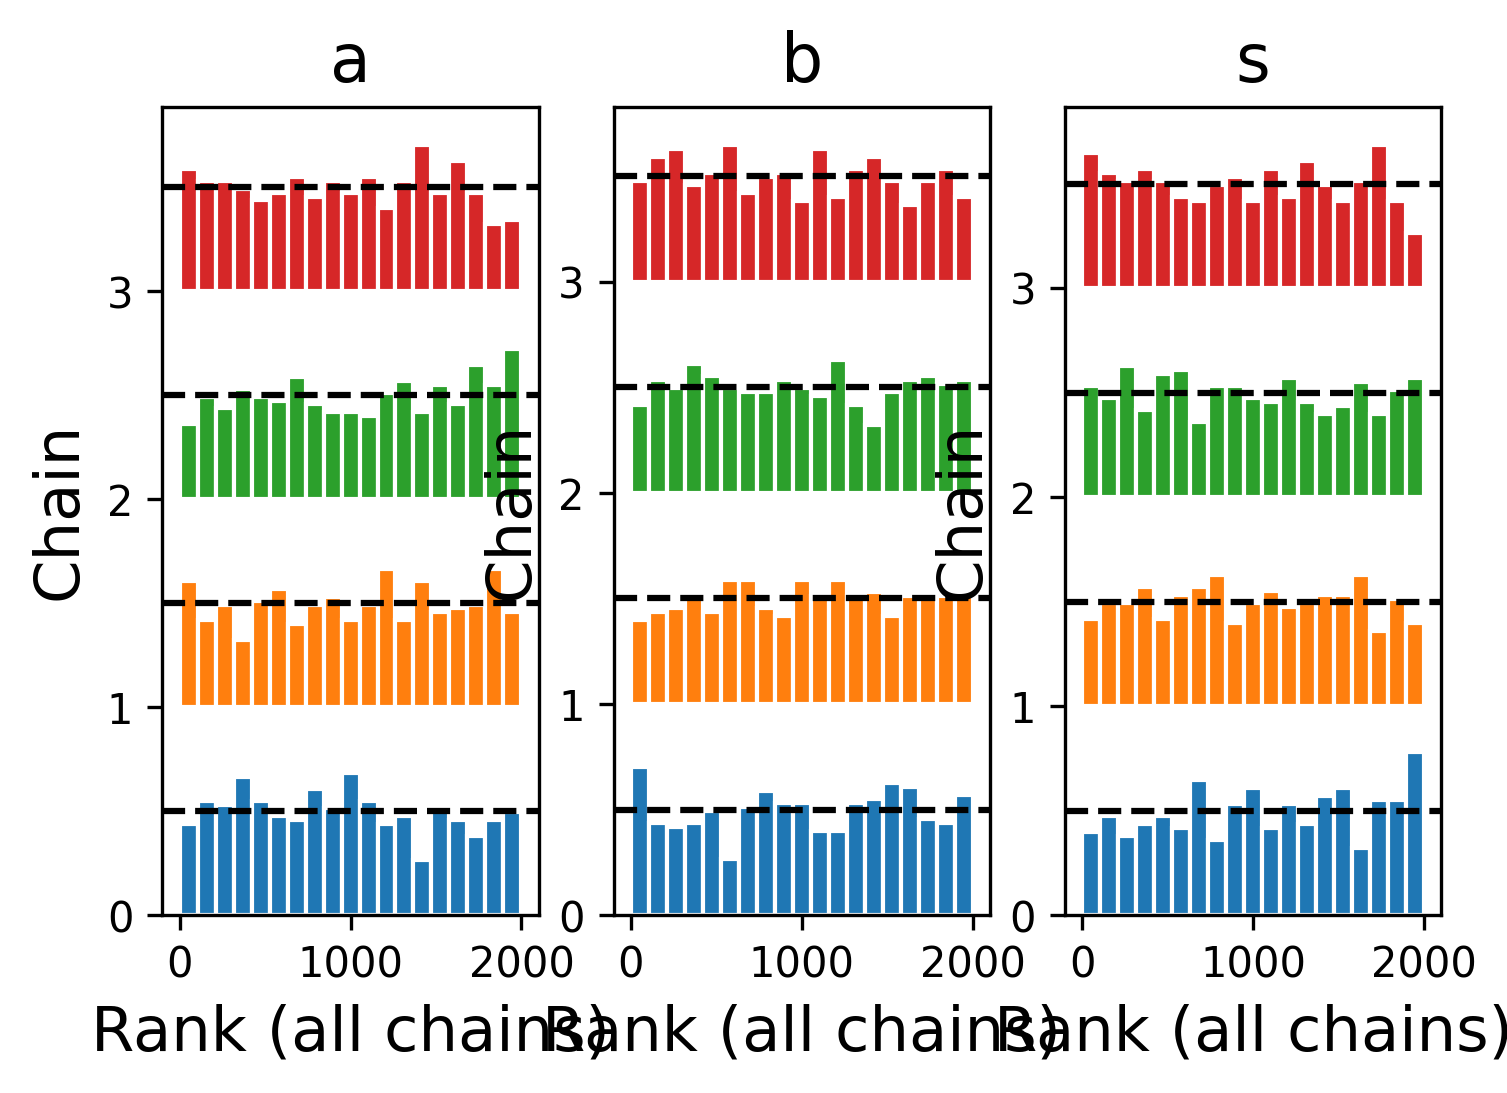

In [9]:
m.diag.rank()

## Evolution of effective sample size across iterations

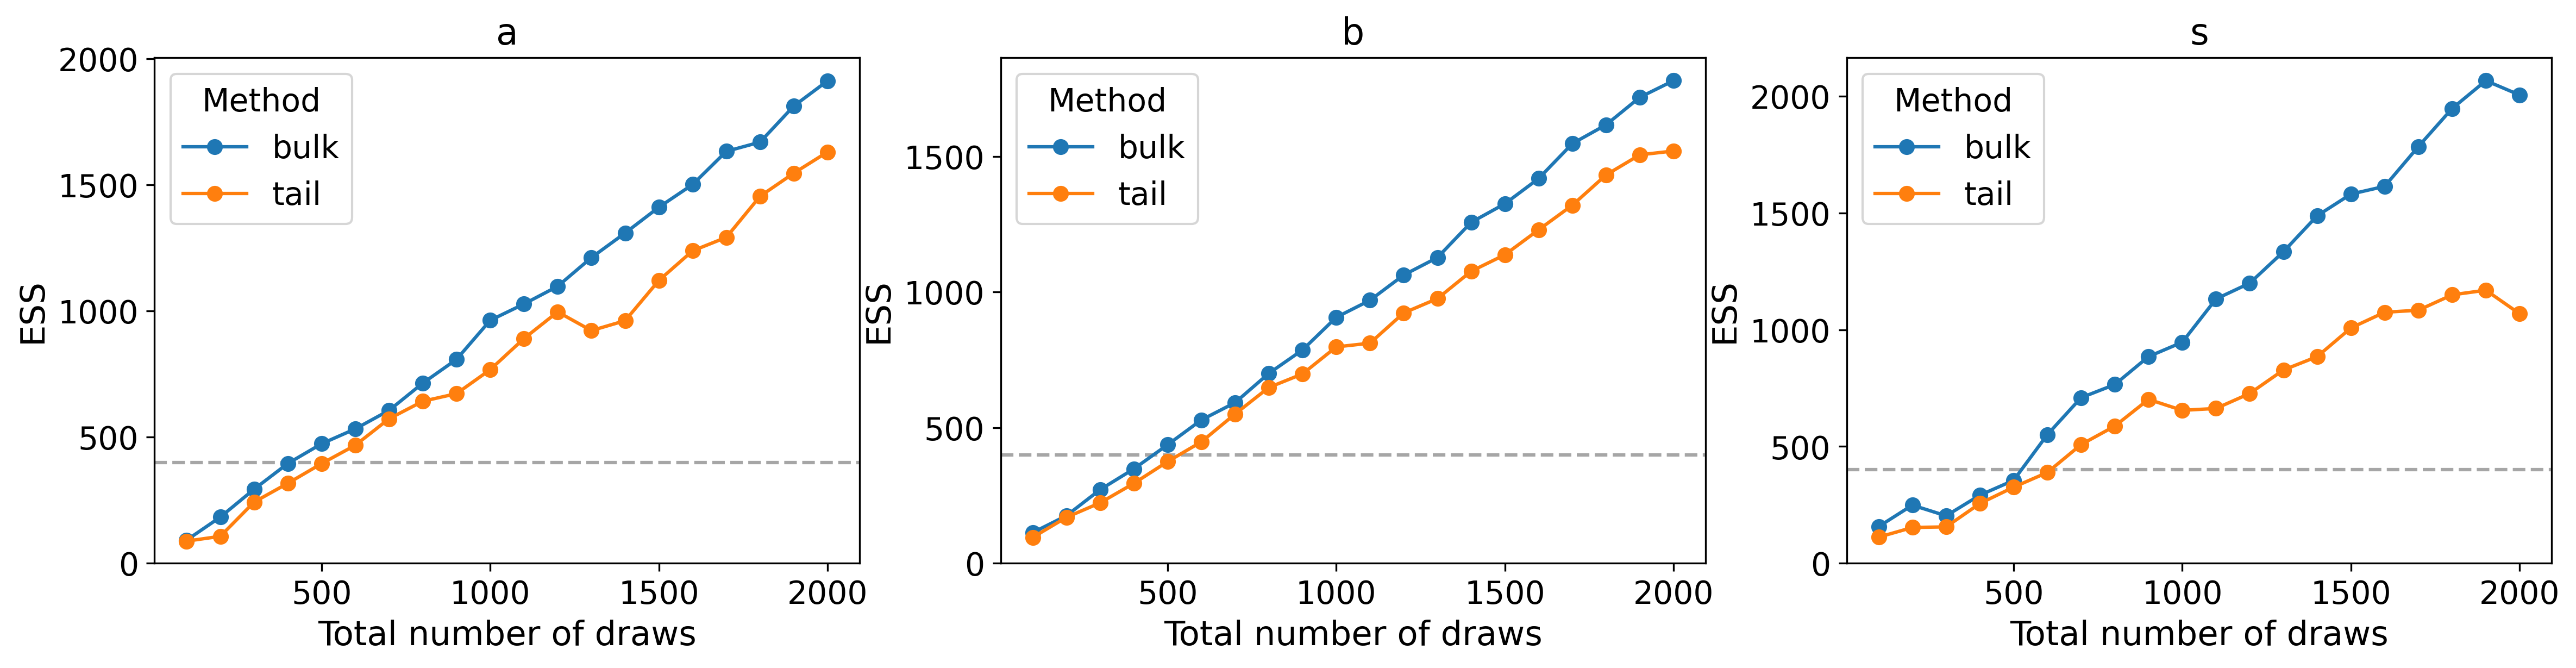

In [10]:
m.diag.plot_ess()

## Pareto-smoothed

In [11]:
m.diag.loo()

Computed from 2000 posterior samples and 346 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1058.52    14.68
p_loo        3.23        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)      346  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

##  Widely applicable information criterion

In [12]:
m.diag.WAIC()

Computed from 2000 posterior samples and 346 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1058.51    14.68
p_waic        3.21        -